# **선형회귀 linear regression**

* 가장 기본적인 머신러닝의기법 중 하나로, 데이터를 선형 상관 관계로 모델링해 우리가 알고자 하는 값을 예측해내는 방식이다. 

* 회귀 문제는 주어진 데이터포인트  x 에 해당하는 실제 값으로 주어지는 타겟  y 를 예측하는 과제이다. 회귀 문제는 현실에서 많이 보이는 문제.
* 예를 들면, 주택 가격, 기온, 판매량 등과 같은 연속된 값을 예측하는 문제들을 들 수 있다. 
이는 결과 값이 이미지 분류와 같이 과일의 종류를 예측하는 이산적인(discrete) 구분 문제(classification)와는 다르다.

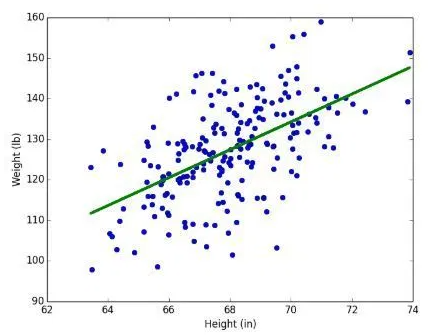

* 데이터 포인트들을  X  로, 타겟 변수는  y  로 표현한다.

* 각 데이터 포인트  $x_i$  와 이에 대한 label 값인  $y_i$  를 추정해서 연관시켜주는  가중치(weight)  벡터  $w$  와  $bias$  $b$  를 찾아보는 것을 시도해본다. 이를 조금 전문적인 수학 기호로 표현하면, 위 긴 합은  $y=w⊤x+b$  이 된다.

* 마지막으로, 데이터 포인트들의 집합  $X$  와 예측 값  $y$  은 아래와 같은 행렬-벡터 곱의 공식이 된다.

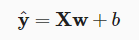

$$hat(y)$$

## **OLS**

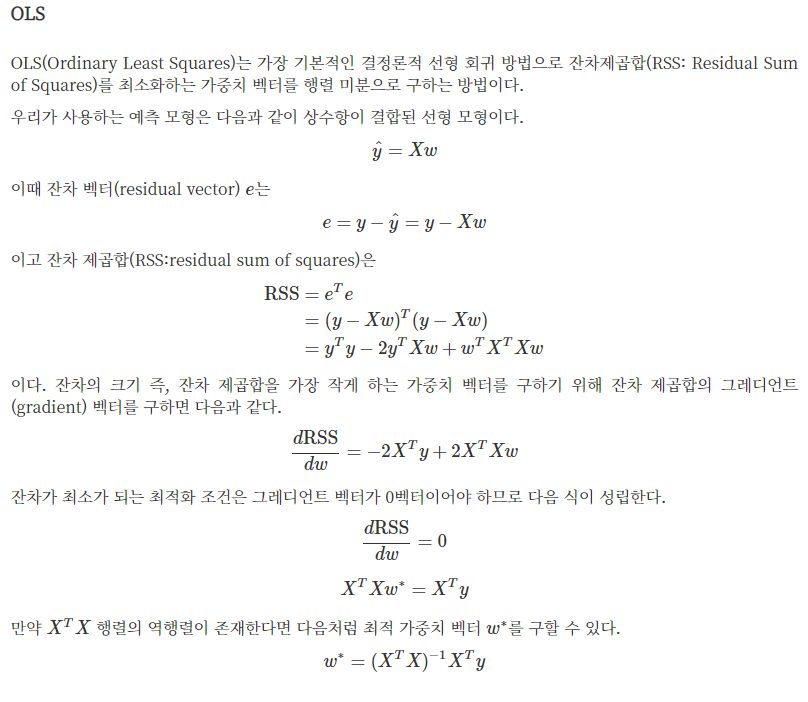

 ## **Numpy를 이용한 선형 회귀분석**

In [43]:
import numpy as np
from sklearn.datasets import make_regression
import statsmodels.api as sm


* make_regression 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [42]:
bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

* 우리가 준 bias 값은 100이고 make_regression 명령이 생성한 모수 값은 다음과 같다.

In [44]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$y=100+86.44794301x+ϵ$$
 
위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [45]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

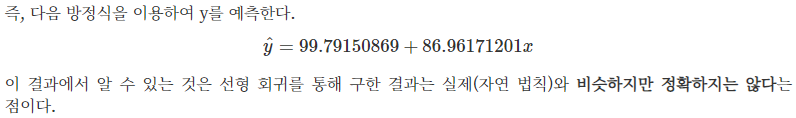

In [46]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[99.79150869],
       [86.96171201]])

image.png

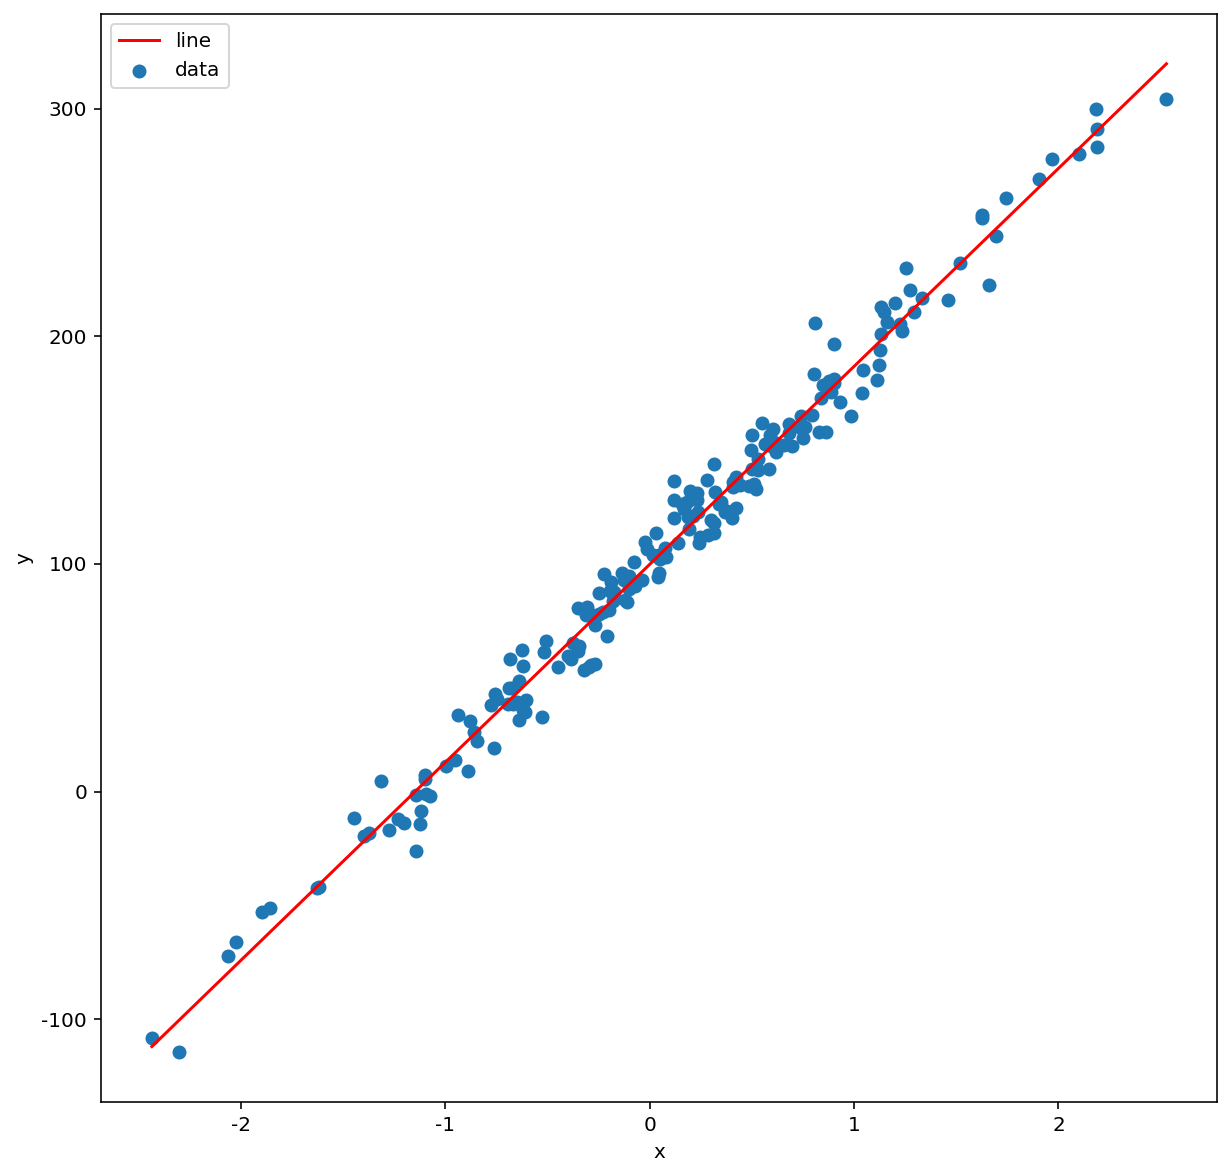

In [57]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.figure(figsize=(10,10))
plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## **scikit-learn 패키지를 사용한 선형 회귀분석**

* scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용한다. 사용법은 다음과 같다.



**1.   LinearRegression 클래스 객체 생성**


In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

* fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트 값이 True이고 만약 상수항이 없으면 fit_intercept=False로 설정한다.

**2. fit 메서드로 모형 추정**

* 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.

In [60]:
 model = model.fit(X, y)

* 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환한다.



*   coef_ : 추정된 가중치 벡터
*   intercept_ : 추정된 상수항


**3. predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측**

              y_new = model.predict(x_new)

* 위 예제를 LinearRegression 클래스로 선형회귀를 하면 다음과 같다.

In [62]:
model = LinearRegression().fit(X0, y)
print(model.coef_, model.intercept_)

[[86.96171201]] [99.79150869]


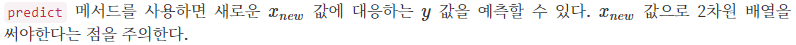

In [63]:
model.predict([[3]])

array([[360.67664473]])

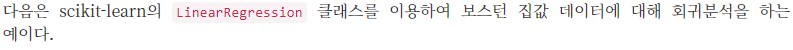

In [64]:
from sklearn.datasets import load_boston

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

* 추정한 가중치 값은 다음과 같다. 특징 벡터의 이름과 비교하면 각각의 가중치가 가지는 의미를 알 수 있다. 예를 들어 방(RM) 하나가 증가하면 가격 예측치는 약 3,810달러 정도 증가한다는 것을 알 수 있다.

In [65]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [66]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [67]:
model_boston.intercept_

36.459488385090125

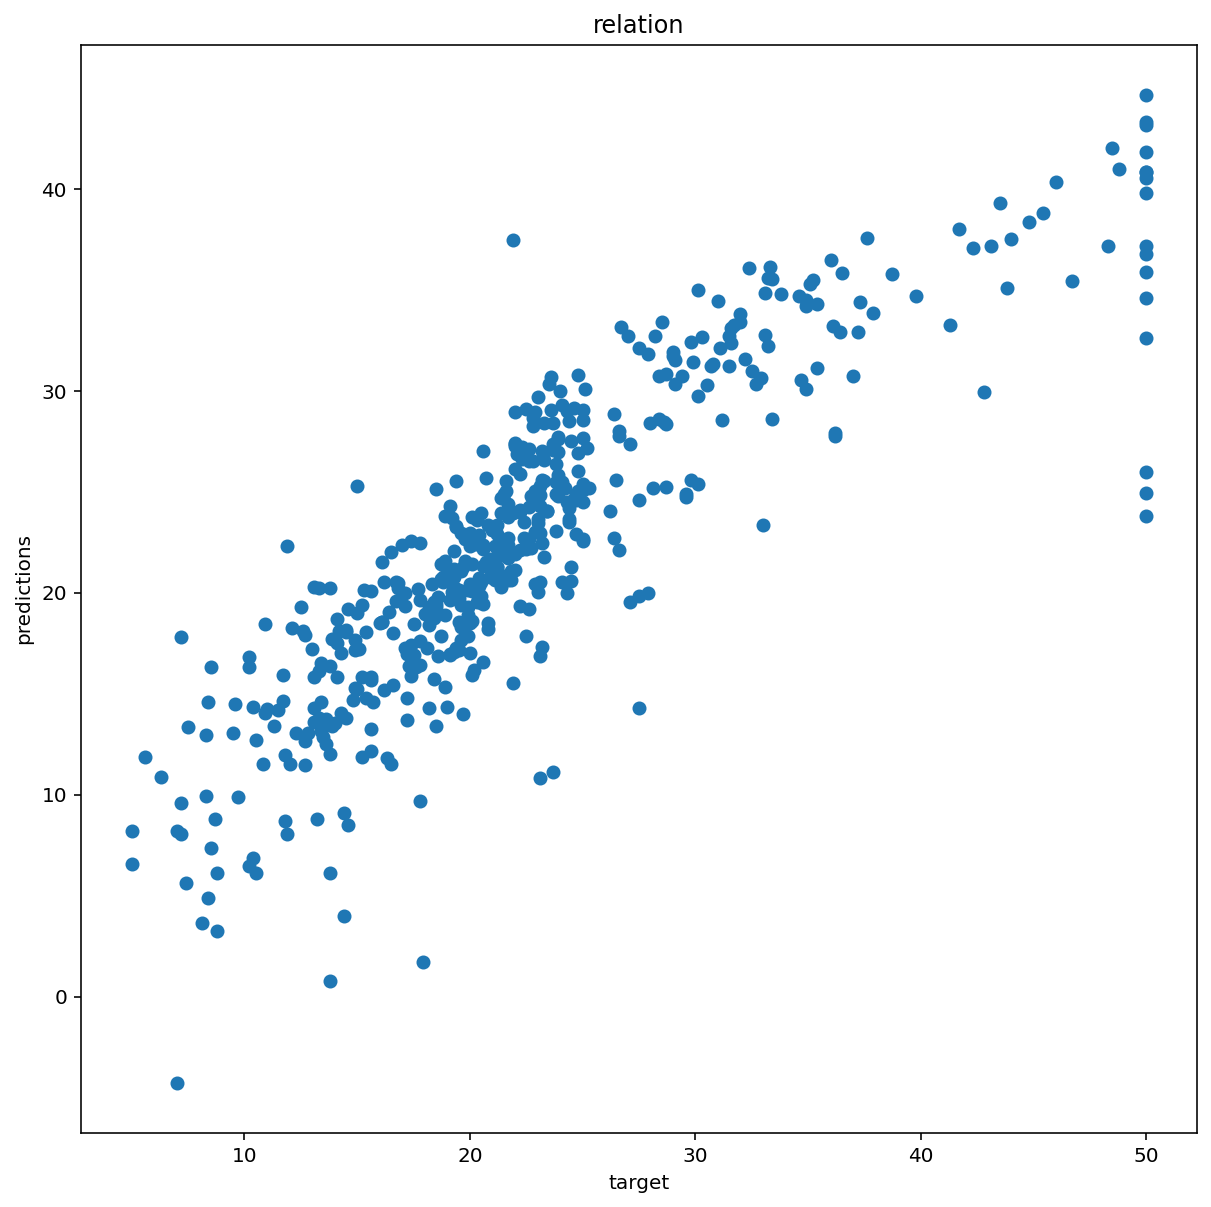

In [70]:
predictions = model_boston.predict(boston.data)

plt.figure(figsize=(10,10))
plt.scatter(boston.target, predictions)
plt.xlabel(u"target")
plt.ylabel(u"predictions")
plt.title("relation")
plt.show()

출처 : https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/

# **정규화(regularized) 선형회귀** 



##**Ridge 회귀모형**




- Ridge 회귀모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.


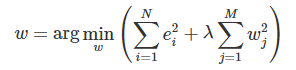

* λ 는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다.  λ 가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다.  λ 가 작아지면 정규화 정도가 작아지며  λ  가 0이 되면 일반적인 선형 회귀모형이 된다.

In [71]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

boston = load_boston()
X = boston.data
y = boston.target

ridge = Ridge()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1.0}
-35.266731097496645


##**Lasso 회귀모형**

* Lasso(Least Absolute Shrinkage and Selection Operator) 회귀모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.




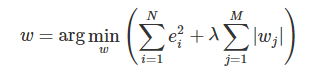

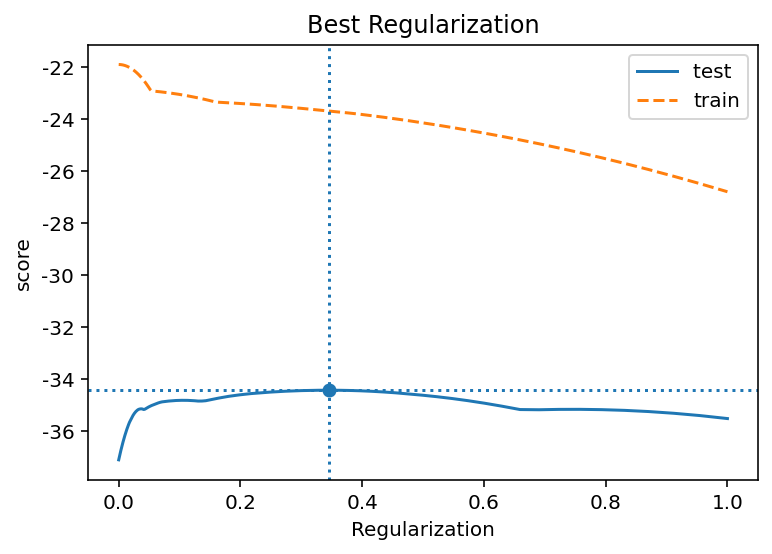

In [72]:
## lasso
alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [73]:
lasso = Lasso()
alphas = np.logspace(-4, 0, 200)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X,y)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.34489622604057596}
-34.43956970904193


출처 : https://riverzayden.tistory.com/m/15?category=353382

# **로지스틱회귀 (Logistic Regression)**

## **개념**

- 로지스틱 회귀분석은 종속변수(Y)와 독립변수(X) 간의 관계를 나타내어 예측모델을 생성한다는 점에서 선형회귀 분석과 비슷하지만, 종속변수(Y)의 결과가 범주형으로 분류 분석에 해당된다

* 반응변수가 1 또는 0인 이진형 변수에서 쓰이는 회귀분석 방법이다.
* 종속변수에 로짓변환을 실시하기 때문에 로지스틱 회귀분석이라고 불린다.

- 로지스틱 회귀는 두 개의 카테고리로 분류되는 범주형 데이터를 예측할 때 적합하다.

- ex. 합격/불합격, 높음/낮음, 정답/오답 등

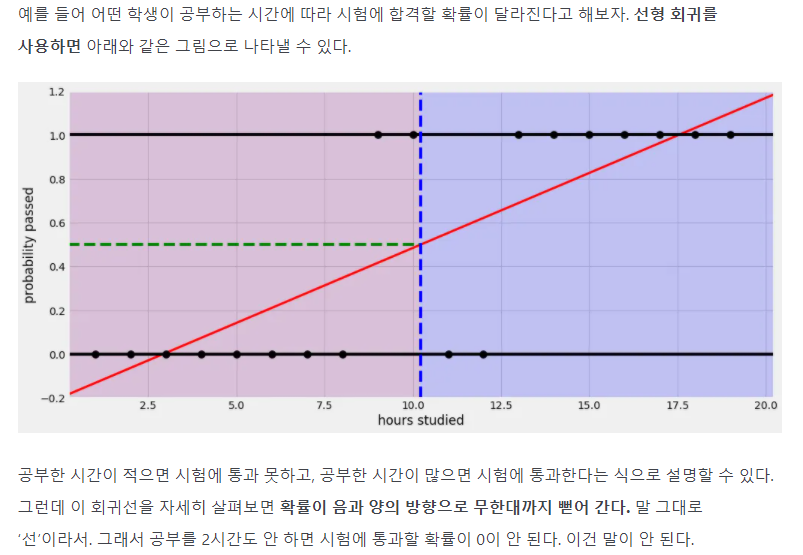

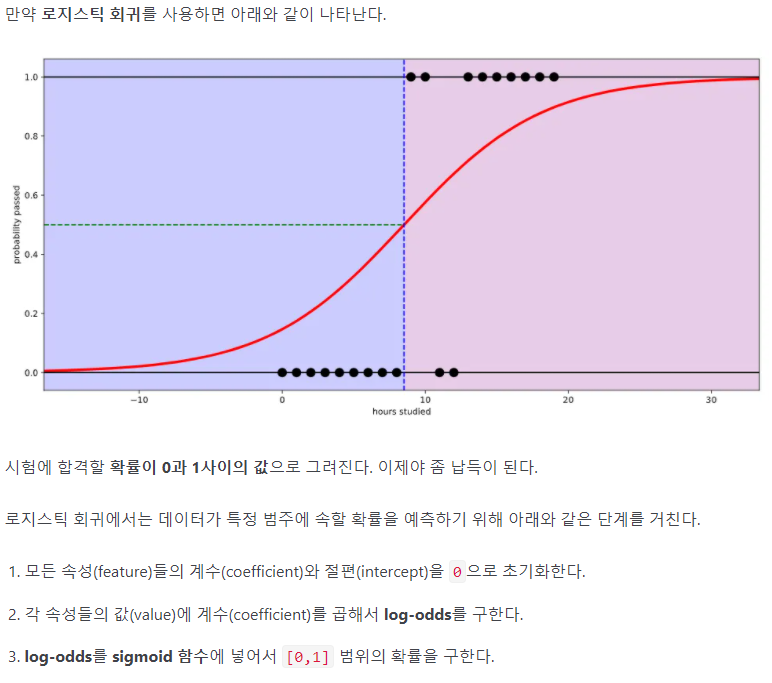

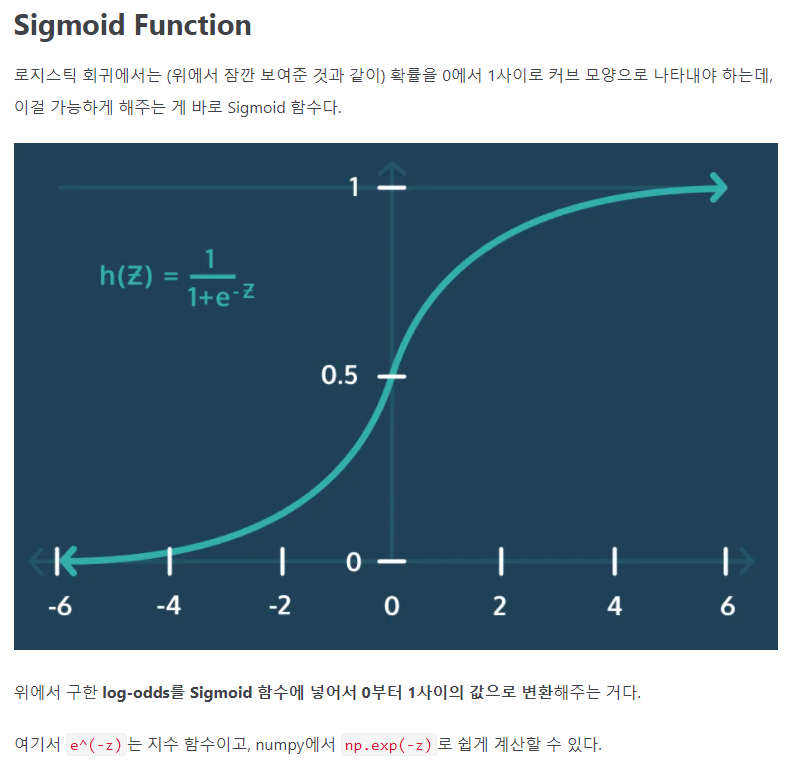

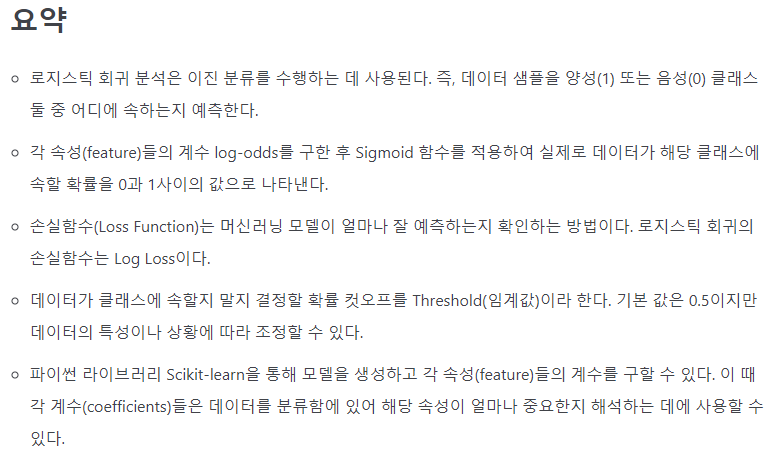

출처 : http://hleecaster.com/ml-logistic-regression-concept/

## **sklearn LogisticRegression 사용법**

### **예제1**

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()

# 표준화 수행 하여 데이터 변경​
data_scaled = scaler.fit_transform(cancer.data)

# 학습데이터와 테스트 데이터로 분할​
x_train,x_test, y_train,y_test = train_test_split(data_scaled, cancer.target,
                                                  test_size=0.3,
                                                  random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

# 학습된 모델에 테스트 데이터(x_test) 입력하여 예측값 생성
lr_preds = lr_clf.predict(x_test)

# 예측값(y_pred)과 테스트 데이터의 정답(y_test)을 이용하여 성능 측정
print('Accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('Recall: {:0.3f}'.format(recall_score(y_test, lr_preds)))
print('Precision: {:0.3f}'.format(precision_score(y_test, lr_preds)))

Accuracy: 0.977
Recall: 0.991
Precision: 0.973


In [6]:
import numpy as np

bias = np.round(lr_clf.intercept_, 11)
weight = np.round(lr_clf.coef_[0], 1)

print('Bias:', bias)
print('Weight:', weight)

Bias: [0.04258607]
Weight: [-0.3 -0.6 -0.3 -0.4 -0.1  0.4 -0.7 -0.7 -0.4  0.  -1.4  0.1 -0.9 -1.
  0.3  0.9 -0.1 -0.3  0.2  0.9 -0.8 -0.9 -0.7 -0.8 -0.6  0.2 -0.8 -1.1
 -0.5 -0.6]


In [7]:
import pandas as pd

coeff = pd.Series(data= weight,index=cancer.feature_names[:30])
coeff.sort_values(ascending=False)

compactness error          0.9
fractal dimension error    0.9
mean compactness           0.4
smoothness error           0.3
worst compactness          0.2
symmetry error             0.2
texture error              0.1
mean fractal dimension     0.0
mean smoothness           -0.1
concavity error           -0.1
concave points error      -0.3
mean perimeter            -0.3
mean radius               -0.3
mean symmetry             -0.4
mean area                 -0.4
worst symmetry            -0.5
worst smoothness          -0.6
mean texture              -0.6
worst fractal dimension   -0.6
mean concave points       -0.7
mean concavity            -0.7
worst perimeter           -0.7
worst area                -0.8
worst concavity           -0.8
worst radius              -0.8
worst texture             -0.9
perimeter error           -0.9
area error                -1.0
worst concave points      -1.1
radius error              -1.4
dtype: float64

### **예제2 - 타이타닉 데이터**

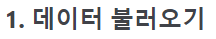

In [10]:
import pandas as pd
passengers = pd.read_csv("train.csv")
print(passengers.shape)
print(passengers.head())

(891, 12)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


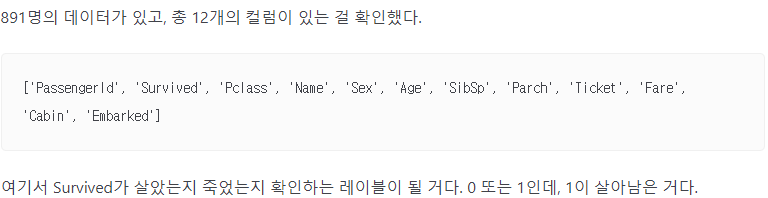

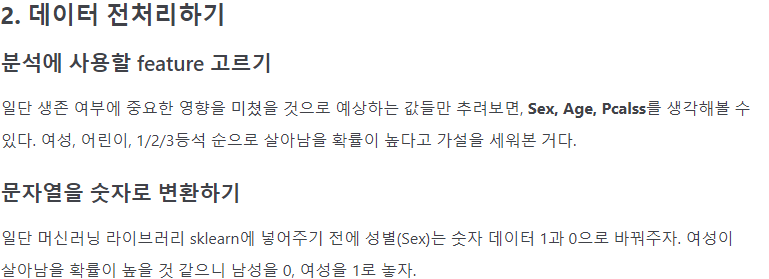

In [11]:
passengers['Sex'] = passengers['Sex'].map({'female':1,'male':0})

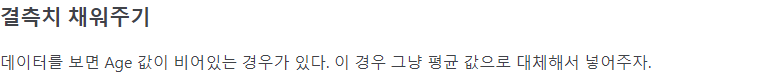

In [12]:
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

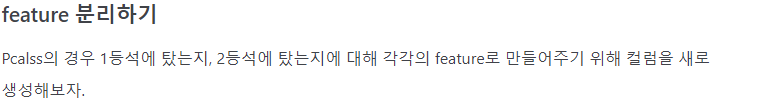

In [13]:
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)

In [14]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

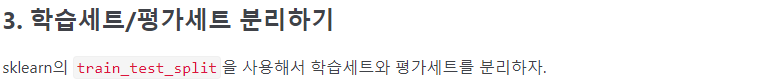

In [15]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

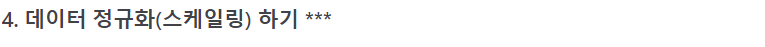

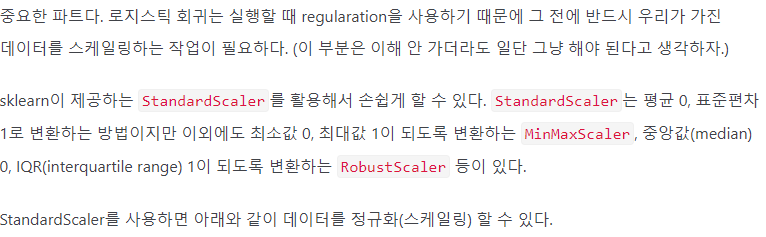

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

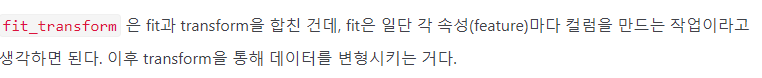

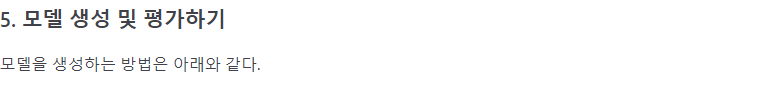

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

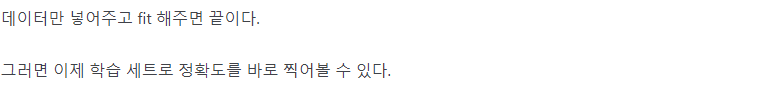

In [18]:
print(model.score(train_features, train_labels))

0.7829341317365269


* 78% 정도 맞춤

In [19]:
print(model.score(test_features, test_labels))

0.7892376681614349


* 79% 정도 맞춤

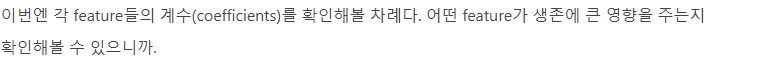

In [20]:
print(model.coef_)

[[ 1.21733317 -0.41418013  1.01452488  0.4590782 ]]


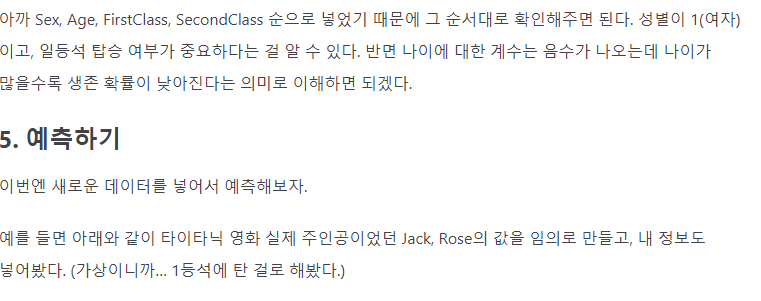

In [21]:
import numpy as np

Jack = np.array([0.0, 20.0, 0.0, 0.0])
Rose = np.array([1.0, 17.0, 1.0, 0.0])
ME = np.array([0.0, 32.0, 1.0, 0.0])

sample_passengers = np.array([Jack, Rose, ME])

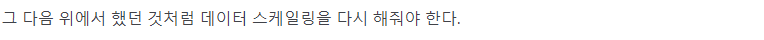

In [22]:
sample_passengers = scaler.transform(sample_passengers)

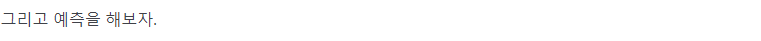

In [23]:
print(model.predict(sample_passengers))

[0 1 1]


In [24]:
print(model.predict_proba(sample_passengers))

[[0.87829533 0.12170467]
 [0.04686724 0.95313276]
 [0.49811562 0.50188438]]


* 살아남을 확률 50%